Saving final_player_dataset.csv to final_player_dataset (1).csv
Shape: (110, 43)
              p_id2  start_year  season_days_injured  total_days_injured  \
0  abdelhamidsabiri        2018                   95                 178   
1  abdelhamidsabiri        2018                   95                 178   
2  abdelhamidsabiri        2018                   95                 178   
3   aboubakarkamara        2018                   42                 124   
4    ademolalookman        2018                   78                 105   

   season_minutes_played  season_games_played  season_matches_in_squad  \
0                   48.0                    2                        2   
1                   48.0                    2                        2   
2                   48.0                    2                        2   
3                  745.0                   13                       17   
4                  701.0                   21                       30   

   total_minutes_

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,929 (300.50 KB)

 Trainable params: 76,929 (300.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.1054 - mae: 0.2804 - val_loss: 0.1784 - val_mae: 0.3785
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0384 - mae: 0.1485 - val_loss: 0.1103 - val_mae: 0.2920
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0400 - mae: 0.1618 - val_loss: 0.1070 - val_mae: 0.2877
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0350 - mae: 0.1509 - val_loss: 0.1288 - val_mae: 0.3234
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0273 - mae: 0.1184 - val_loss: 0.1388 - val_mae: 0.3364
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0318 - mae: 0.1272 - val_loss: 0.1227 - val_mae: 0.3161
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0325 - mae: 0.1339 - val_loss: 0.1143 - val_mae: 0.3046
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0253 - mae: 0.1219 - val_loss: 0.1110 - val_mae: 0.3001
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0291 - mae: 0.1321 - 

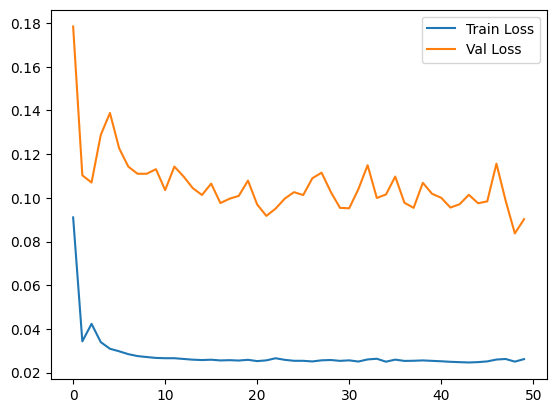

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
   Actual_Fee  Predicted_Fee
0    4.046554       1.921381
1    4.046554       1.963976
2    4.046554       2.053677
3    4.046554       2.055934
4    1.945910       2.037734
5    1.945910       2.026424
6    3.473518       2.002658
7    3.473518       2.032831
8    2.772589       2.031484
9    3.044522       1.983644


In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


from google.colab import files
uploaded = files.upload()   # Upload your "final_player_dataset.csv"

df = pd.read_csv("final_player_dataset.csv")
print("Shape:", df.shape)
print(df.head())


features = [
    'season_minutes_played', 'season_games_played',
    'injury_risk_score', 'Sentiment_Score', 'Weighted_Sentiment'
]
target = 'Log_Fee'
df = df.dropna(subset=features+[target])

X = df[features].values
y = df[target].values.reshape(-1,1)


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)


def create_sequences(X, y, timesteps=3):
    Xs, ys = [], []
    for i in range(len(X)-timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

timesteps = 3
X_seq, y_seq = create_sequences(X_scaled, y_scaled, timesteps)

print("LSTM input shape:", X_seq.shape)  # (samples, timesteps, features)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


model = Sequential([
    LSTM(128, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, verbose=1)


loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)


results = pd.DataFrame({"Actual_Fee": y_true.flatten(), "Predicted_Fee": y_pred.flatten()})
print(results.head(10))
